### Importando bibliotecas necessárias

In [84]:
import pandas as pd
pd.options.display.float_format = "{:20,.2f}".format  # formata números do tipo float apresentados pelo pandas
import matplotlib.pyplot as plt
plt.style.use("seaborn")

### Lendo dataSet

In [85]:
df = pd.read_excel("AdventureWorks.xlsx")
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


### Tamanho do dataset

In [86]:
df.shape

(904, 16)

### Tipos dos dados das colunas

In [87]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

### Verificando valores ausentes

In [88]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

## Receita total

In [104]:
round(df['Valor Venda'].sum()

5984606.14

## Custo total

### Adicionando coluna Custo

In [90]:
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])
df["Custo"]

0                 2,091.48
1                 2,091.48
2                 2,091.48
3                 2,091.48
4                 2,091.48
              ...         
899               1,985.94
900               1,948.14
901               1,948.14
902               1,985.94
903               1,948.14
Name: Custo, Length: 904, dtype: float64

### Calculando o Custo total

In [91]:
round(df['Custo'].sum(), 2)

2486783.05

## Lucro total

### Adicionando coluna Lucro

In [92]:
df["Lucro"] = df["Valor Venda"] - df["Custo"]
df["Lucro"]

0                 2,456.52
1                 2,456.52
2                 2,456.52
3                 2,456.52
4                 2,456.52
              ...         
899               3,588.48
900               2,755.86
901               2,755.86
902               2,809.26
903               2,755.86
Name: Lucro, Length: 904, dtype: float64

### Calculando Lucro total

In [93]:
round(df['Lucro'].sum(), 2)

3497823.09

## Tempos de envio, média dos tempos de envio e média dos tempos de envio por marca

### Adicionando coluna Tempo Envio

In [94]:
df["Tempo Envio"] = df["Data Envio"] - df["Data Venda"]
df["Tempo Envio"]

0     20 days
1      5 days
2      6 days
3      6 days
4      7 days
        ...  
899   13 days
900   11 days
901    4 days
902    4 days
903    4 days
Name: Tempo Envio, Length: 904, dtype: timedelta64[ns]

In [95]:
# Convertendo coluna Tempo Envio para inteiro
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df["Tempo Envio"]

0      20
1       5
2       6
3       6
4       7
       ..
899    13
900    11
901     4
902     4
903     4
Name: Tempo Envio, Length: 904, dtype: int64

### Média dos tempos de envio

In [96]:
round(df['Tempo Envio'].mean(), 1)

8.5

### Média dos tempos de envio por marca

In [97]:
round(df.groupby("Marca")["Tempo Envio"].mean(), 1)

Marca
Adventure Works                   8.70
Contoso                           8.50
Fabrikam                          8.50
Name: Tempo Envio, dtype: float64

## Lucro e total de produtos vendidos

In [108]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

### Resetando index

In [105]:
# retorna um DataFrame ao invés de uma Series
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


### Quantidade de Produtos vendidos

In [109]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

### Gráfico do total de Produtos vendidos

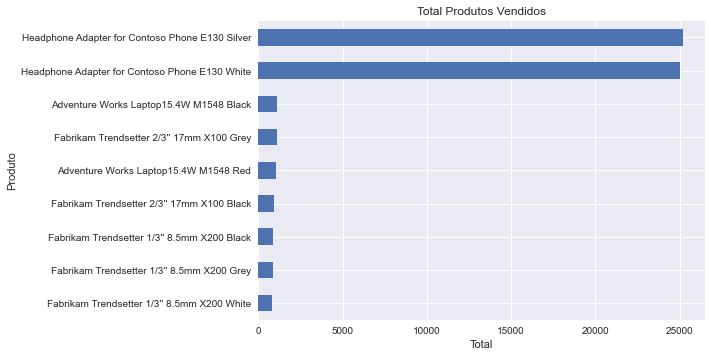

In [110]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

### Lucro por Ano

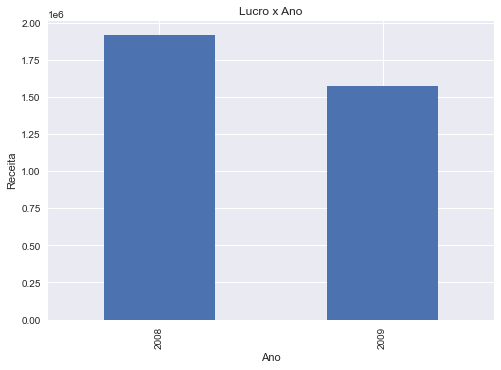

In [112]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

## Vendas do ano de 2009

In [116]:
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


### Lucro por Mês

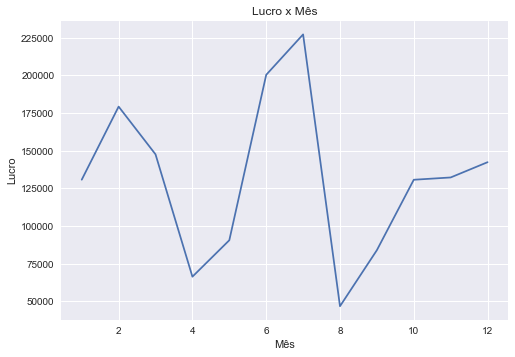

In [117]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

### Lucro por Marca

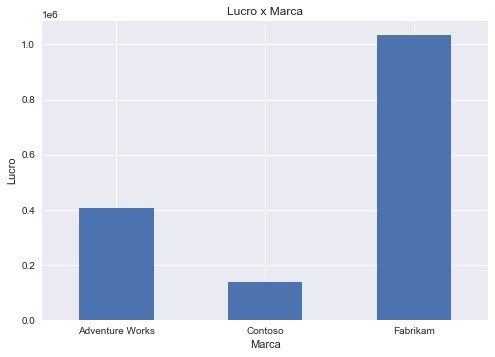

In [118]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");  # coloca a legenda do eixo x na horizontal

### Lucro por Classe

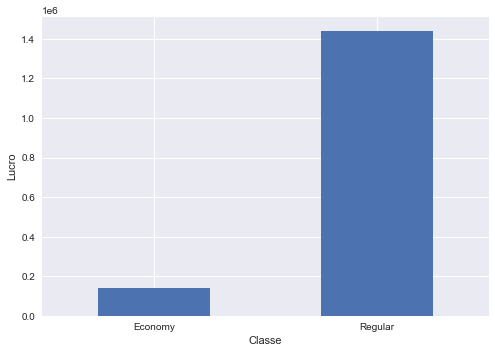

In [119]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar("Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

## Estatísticas do Tempo de Envio

In [120]:
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

### Gráfico Boxplot

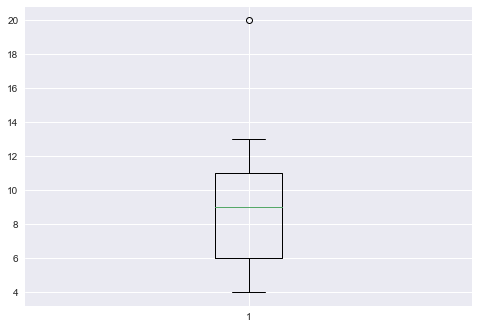

In [121]:
plt.boxplot(df["Tempo Envio"]);

### Histograma

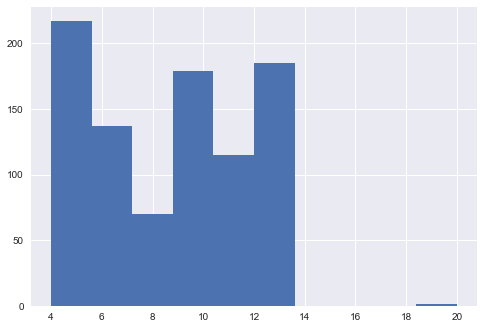

In [129]:
plt.hist(df["Tempo Envio"]);

## Salvando df em arquivo csv

In [125]:
df.to_csv("vendas_AdventureWorks.csv", index=False)